                                Capstone Project 
What are the factors that contribute to a home team winning an NCAA basketball game?



Data is obtained from https:// www.kaggle.com/ncaa/ncaa-basketball. The available data is from 350 college basketball teams, playing in the NCAA since 1985. The data will contain 82,000 data points consisting of 30 variable such as number of assists, three-point percentages per game, win and loss records per season, location of matches played.

The description for the nomenclature used for the dataset is described below
WTEAMID- unique 4 digit number identifying each NCAA men's team
WScore - number of points scored by the winning team
WLoc - Location of where winning match was played, whether Home , Away or Neutral
WFGM - field goals made (by the winning team)
WFGA - field goals attempted (by the winning team)
WFGM3 - three pointers made (by the winning team)
WFGA3 - three pointers attempted (by the winning team)
WFTM - free throws made (by the winning team)
WFTA - free throws attempted (by the winning team)
WOR - offensive rebounds (pulled by the winning team)
WDR - defensive rebounds (pulled by the winning team)
WAst - assists (by the winning team)
WTO - turnovers committed (by the winning team)
WStl - steals (accomplished by the winning team)
WBlk - blocks (accomplished by the winning team)
WPF - personal fouls committed (by the winning team)

same set of stats from the perspective of the losing team starting with "L".




The library's that will be used for data analysis and cleaning will 
be from python. These libraries are numpy for  scientific computing of the numiracal arrays, pandas for data analysis and manipulation ,matplotlib for visualization and seaborn will be used for the statistical analysis

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

                        Data Exploratory
Read csv file and call it capstone.Also, determine the number of data points and features of the capstone dataset. Finally determine the top 5,and bottom 5 observations in the csv file.

In [40]:
capstone= pd.read_csv("mens-machine-learning-competition-2019/Prelim2019_RegularSeasonDetailedResults.csv")

In [41]:
capstone.shape

(87366, 34)

Determine the type of each variable

In [44]:
capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87366 entries, 0 to 87365
Data columns (total 34 columns):
Season     87366 non-null int64
DayNum     87366 non-null int64
WTeamID    87366 non-null int64
WScore     87366 non-null int64
LTeamID    87366 non-null int64
LScore     87366 non-null int64
WLoc       87366 non-null object
NumOT      87366 non-null int64
WFGM       87366 non-null int64
WFGA       87366 non-null int64
WFGM3      87366 non-null int64
WFGA3      87366 non-null int64
WFTM       87366 non-null int64
WFTA       87366 non-null int64
WOR        87366 non-null int64
WDR        87366 non-null int64
WAst       87366 non-null int64
WTO        87366 non-null int64
WStl       87366 non-null int64
WBlk       87366 non-null int64
WPF        87366 non-null int64
LFGM       87366 non-null int64
LFGA       87366 non-null int64
LFGM3      87366 non-null int64
LFGA3      87366 non-null int64
LFTM       87366 non-null int64
LFTA       87366 non-null int64
LOR        87366 non-null 

There were no missing observation in the dataset.

In [38]:
#Teams first participation year is capstone.head()
capstone.head()
#Teams last participation year is capstone.tail()
capstone.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
87361,2019,128,1412,70,1292,61,N,0,24,49,...,30,3,6,10,20,13,14,5,3,20
87362,2019,128,1417,79,1390,72,N,0,25,61,...,25,11,20,18,30,11,12,7,9,22
87363,2019,128,1425,78,1112,65,N,0,29,60,...,22,14,19,11,28,11,12,3,6,17
87364,2019,128,1439,71,1274,56,N,0,27,54,...,29,10,14,10,20,10,8,3,0,10
87365,2019,128,1452,72,1328,71,N,0,27,71,...,12,11,13,5,31,12,8,6,1,15


Deteremine which variables take categorical values and which take non-categorical values

In [24]:
capstone.describe(include='all')

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
count,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366,87366.000000,87366.000000,87366.000000,...,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,51821,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011.238800,71.022286,1287.208044,75.430282,1281.742772,63.436852,NaN,0.068551,26.111668,55.171772,...,19.531328,12.188426,18.042236,11.117094,21.629536,11.439931,14.316840,6.009512,2.869732,19.769281
std,4.843578,35.413376,104.766049,11.135159,104.011645,10.976527,NaN,0.306074,4.701397,7.567446,...,5.957377,5.368947,7.145184,4.207528,4.544295,3.732077,4.407909,2.767259,2.037440,4.528362
min,2003.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,NaN,0.000000,10.000000,27.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,2007.000000,40.000000,1198.000000,68.000000,1191.000000,56.000000,NaN,0.000000,23.000000,50.000000,...,15.000000,8.000000,13.000000,8.000000,19.000000,9.000000,11.000000,4.000000,1.000000,17.000000
50%,2011.000000,74.000000,1285.000000,75.000000,1280.000000,63.000000,NaN,0.000000,26.000000,55.000000,...,19.000000,12.000000,18.000000,11.000000,21.000000,11.000000,14.000000,6.000000,3.000000,20.000000
75%,2015.000000,101.000000,1379.000000,82.000000,1373.000000,70.000000,NaN,0.000000,29.000000,60.000000,...,23.000000,16.000000,23.000000,14.000000,25.000000,14.000000,17.000000,8.000000,4.000000,23.000000


We can see that the WLoc takes the categorical values, which are N,H,A

In [126]:
capstone.WLoc.unique()

array(['N', 'H', 'A'], dtype=object)

From the data, we can see that the winner team (starts with "W"), and the losing team starts with ("L"). The Wscore and LScore is the winner-loser score at the end of the game.
WLoc stores the "location" of the winning team, either {N, A, H} where "H" stands for "H" Home , "A" is away ( visiting to opponent's site), while "N" is a neutral location

In [25]:
capstone.isnull().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
WFGM       0
WFGA       0
WFGM3      0
WFGA3      0
WFTM       0
WFTA       0
WOR        0
WDR        0
WAst       0
WTO        0
WStl       0
WBlk       0
WPF        0
LFGM       0
LFGA       0
LFGM3      0
LFGA3      0
LFTM       0
LFTA       0
LOR        0
LDR        0
LAst       0
LTO        0
LStl       0
LBlk       0
LPF        0
dtype: int64

The dataframe will be restricted to the number of points scored in a match. The two point and three points scores will be added together.

In [48]:
for name in capstone.select_dtypes(include=['object']).columns:
    display(pd.DataFrame(capstone.select_dtypes(include=['object']).loc[:,name].value_counts()))

,WLoc
H,51821
A,26757
N,8788


In [63]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


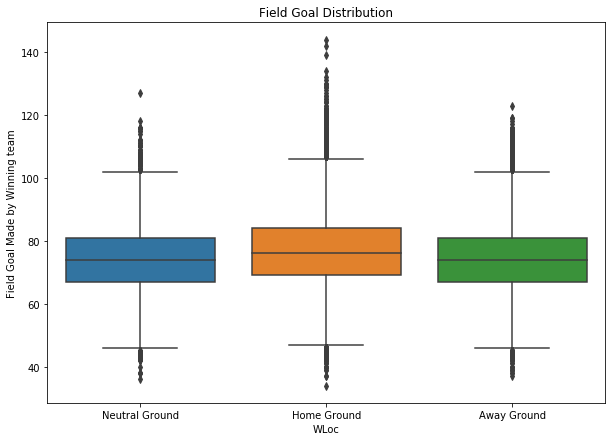

In [128]:
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)

capstone_plot= sns.boxplot(data = capstone, x= 'WLoc',y ='WScore')

ax1.set_title("Field Goal Distribution")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Field Goal Made by Winning team')
plt.show()

My first analysis is that they win more matches at home, than when they are away or at a neutral location. They also score more points at home than away or at a neutral location. The neutral and away ground results are quite similar

In [183]:
capstone.WScore.describe()

count    87366.000000
mean        75.430282
std         11.135159
min         34.000000
25%         68.000000
50%         75.000000
75%         82.000000
max        144.000000
Name: WScore, dtype: float64

In [141]:
capstone[['WTeamID','WScore', 'WLoc']]

,WTeamID,WScore,WLoc
0,1104,68,N
1,1272,70,N
2,1266,73,N
3,1296,56,N
4,1400,77,N
...,...,...,...
87361,1412,70,N
87362,1417,79,N
87363,1425,78,N
87364,1439,71,N


In [142]:
capstone[['LTeamID','LScore', 'WLoc']]

,LTeamID,LScore,WLoc
0,1328,62,N
1,1393,63,N
2,1437,61,N
3,1457,50,N
4,1208,71,N
...,...,...,...
87361,1292,61,N
87362,1390,72,N
87363,1112,65,N
87364,1274,56,N


In [181]:
capstone[capstone.WLoc == 'H']

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
5,2003,11,1458,81,1186,55,H,0,26,57,...,11,12,17,6,22,8,19,4,3,25
6,2003,12,1161,80,1236,62,H,0,23,55,...,15,20,28,9,21,11,30,10,4,28
9,2003,12,1458,84,1296,56,H,0,32,67,...,14,7,12,9,23,10,18,1,3,18
10,2003,13,1166,106,1426,50,H,0,41,69,...,11,12,17,8,15,8,17,7,3,15
13,2003,13,1323,76,1125,48,H,0,25,56,...,24,4,8,14,26,12,17,10,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87330,2019,127,1419,89,1111,80,H,0,31,62,...,30,14,18,6,20,10,12,5,4,15
87331,2019,127,1420,90,1216,85,H,2,31,69,...,29,26,33,6,26,14,12,10,2,24
87332,2019,127,1436,84,1127,51,H,0,32,55,...,24,2,3,6,14,8,9,4,4,10
87336,2019,128,1159,94,1137,80,H,0,30,52,...,31,19,25,7,17,16,12,4,1,24


In [184]:
#capstone_plot2= sns.barplot(data = capstone, x= 'WTeamID', hue ='WLoc',y ='WScore')
